## 1. Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
'''--------- 1. Data Manipulation ---------'''
import numpy as np
import pandas as pd
'''--------- 2. Data Preprocessing ---------'''
from sklearn.preprocessing import LabelEncoder #Encode Non-numeric Var
from sklearn.preprocessing import MinMaxScaler # Feature Scaling
from sklearn.model_selection import train_test_split #Train Test Validation Split
'''--------- 3. Data Visualization ---------'''
import seaborn as sns
import matplotlib.pyplot as plt
'''--------- 4. Model Training ---------'''
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
'''--------- 5. Model Evluation ---------'''
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
'''--------- 6. Others ---------'''
import random
from pydub import AudioSegment
from IPython import display
import librosa

## 2. Load Excel File

In [3]:
df = pd.read_excel("D:/UM/Project/Mozartify/project/Datasets/Features/Features1D/Features1D.xlsx")
df

,Unnamed: 0,file,scale,key,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,...,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20,mood
0,0,D:/UM/Project/Mozartify/project/Datasets/audio...,major,D,135.999178,0.171184,0.003348,0.344088,0.098565,2289.203183,...,97.696182,-3.537810,71.402687,-0.436729,66.260963,-0.202857,59.259083,0.894741,47.133595,happy
1,1,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,107.666016,0.106427,0.000725,0.416452,0.090011,2129.307062,...,37.896637,-9.209418,46.455044,-1.426528,50.276150,-3.567492,65.857529,1.226228,85.487991,happy
2,2,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,99.384014,0.241972,0.010910,0.435837,0.084253,2980.267152,...,67.306412,-6.006174,66.395699,-1.117358,49.001869,-4.630496,50.317497,0.654567,79.517960,happy
3,3,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,107.666016,0.120562,0.002160,0.420664,0.079768,2882.799693,...,33.676331,-4.147554,37.201412,-3.797808,32.774509,-8.426100,32.341358,-6.023935,30.663700,happy
4,4,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,129.199219,0.192818,0.003956,0.274221,0.085475,2146.962603,...,28.778049,-10.854812,36.313950,-0.480542,47.509182,-4.177841,60.641903,6.327812,64.390320,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,968,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,151.999081,0.097105,0.000582,0.293956,0.088207,1997.276683,...,52.399574,-18.951229,71.105469,-6.146902,61.915462,-16.994026,55.398777,-14.183487,64.577774,sad
969,969,D:/UM/Project/Mozartify/project/Datasets/audio...,minor,G#,89.102909,0.083837,0.001618,0.272151,0.084929,1331.011559,...,37.900272,-11.959914,43.625828,-5.335443,40.348934,-10.943409,37.393105,-15.349643,56.387405,sad
970,970,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,99.384014,0.076661,0.000290,0.237400,0.089330,1681.161502,...,46.293671,-5.706831,39.779736,-3.286500,47.729607,1.990399,70.187508,5.452133,70.151512,sad
971,971,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,99.384014,0.071242,0.001089,0.263051,0.092084,2075.571372,...,45.630798,-16.532892,45.669132,-11.235711,48.995541,-15.730806,54.862488,-15.158969,68.118660,sad


In [4]:
df_noise = pd.read_excel("D:/UM/Project/Mozartify/project/Datasets/Features/Features1D/Features_noise.xlsx")
df_noise

,Unnamed: 0,file,scale,key,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,...,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20,mood
0,0,D:/UM/Project/Mozartify/project/Datasets/audio...,major,D,135.999178,0.172551,0.003279,0.346737,0.097540,2966.634004,...,85.576714,-1.930645,56.159031,-0.892971,51.551453,0.633405,47.186474,0.253610,38.859661,happy
1,1,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,107.666016,0.108430,0.000697,0.425311,0.088677,3245.481036,...,27.379467,-5.753342,32.791855,-4.232408,35.934994,-1.325320,49.086235,-1.749682,67.460434,happy
2,2,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,99.384014,0.242929,0.010846,0.438916,0.083680,3349.734719,...,59.253696,-4.593424,57.105923,-2.326811,42.335182,-3.384727,42.804070,-0.737544,61.920296,happy
3,3,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,107.666016,0.122461,0.002094,0.429079,0.077916,3441.083045,...,29.263926,-2.092536,28.378841,-3.750346,26.634878,-5.963063,27.701960,-6.120047,26.094809,happy
4,4,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,129.199219,0.194006,0.003910,0.276141,0.085043,2714.529319,...,22.606628,-7.715428,26.561018,-3.081796,38.821686,-1.843145,54.758949,4.226146,58.505424,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,968,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,151.999081,0.099292,0.000553,0.302301,0.086560,3586.618854,...,25.648636,-11.969786,31.615791,-8.434127,28.832972,-11.089932,23.921122,-12.584082,28.737524,sad
969,969,D:/UM/Project/Mozartify/project/Datasets/audio...,minor,G#,89.102909,0.086727,0.001535,0.288060,0.082760,3649.597341,...,24.422441,-10.237507,20.169052,-8.180056,21.755917,-9.295341,18.762970,-10.592243,30.263374,sad
970,970,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,99.384014,0.079354,0.000271,0.249582,0.087047,3687.129803,...,22.693632,-1.819579,22.148537,-2.206744,27.014732,1.092161,37.564590,2.067389,34.046097,sad
971,971,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,99.384014,0.074790,0.000973,0.291124,0.089676,3945.450852,...,26.464180,-9.677834,28.049032,-9.241619,24.549885,-9.959146,28.012188,-10.346671,40.555420,sad


In [5]:
df_shift = pd.read_excel("D:/UM/Project/Mozartify/project/Datasets/Features/Features1D/Features_shift.xlsx")
df_shift

,Unnamed: 0,file,scale,key,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,...,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20,mood
0,0,D:/UM/Project/Mozartify/project/Datasets/audio...,major,D,135.999178,0.171162,0.003351,0.340845,0.097614,2289.203108,...,97.515526,-3.539253,71.415993,-0.424872,66.437180,-0.199554,59.399525,0.886875,47.189739,happy
1,1,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,107.666016,0.106434,0.000724,0.414449,0.089709,2128.873013,...,37.903477,-9.216166,46.307808,-1.430186,50.143211,-3.562091,65.681473,1.210580,85.589287,happy
2,2,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,99.384014,0.241991,0.010835,0.435087,0.083844,2979.436280,...,67.475204,-6.002207,66.501785,-1.109421,48.929623,-4.635880,50.368835,0.668790,79.389671,happy
3,3,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,112.347147,0.120569,0.002160,0.421653,0.079912,2884.974018,...,33.690018,-4.149460,37.224216,-3.795806,32.814350,-8.422532,32.291790,-6.022736,30.629898,happy
4,4,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,129.199219,0.192869,0.003973,0.272747,0.084913,2147.226175,...,28.748222,-10.841578,36.262440,-0.469117,47.630962,-4.169499,60.776985,6.336962,64.402382,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,968,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,151.999081,0.097108,0.000583,0.294316,0.088250,1996.638353,...,52.284241,-18.933998,71.058098,-6.168517,61.867592,-16.978498,55.321728,-14.182650,64.533455,sad
969,969,D:/UM/Project/Mozartify/project/Datasets/audio...,minor,G#,89.102909,0.083857,0.001617,0.272484,0.085090,1331.675571,...,37.903763,-11.966993,43.538395,-5.346477,40.368793,-10.921440,37.538857,-15.324995,56.659206,sad
970,970,D:/UM/Project/Mozartify/project/Datasets/audio...,major,E,99.384014,0.076663,0.000291,0.237296,0.089185,1681.076015,...,46.474285,-5.677488,40.483074,-3.268615,47.944653,1.989569,70.061569,5.450746,69.814407,sad
971,971,D:/UM/Project/Mozartify/project/Datasets/audio...,major,A,99.384014,0.071239,0.001091,0.263241,0.092150,2075.791687,...,45.625221,-16.519905,45.574238,-11.216208,48.625031,-15.720529,54.754559,-15.151942,68.066071,sad


## 3. Data Preprocessing

### 3.1 Split Features and Labels

In [6]:
X = df.drop(['mood'],axis=1)
y = df['mood']

X_noise = df_noise.drop(['mood'],axis=1)
y_noise = df_noise['mood']

X_shift = df_shift.drop(['mood'],axis=1)
y_shift = df_shift['mood']

### 2.2 Encode the non-numerical features labels

**Encode the labels in numerical way:**
- Happy: 1 
- Angry: 0 
- Relaxed: 2 
- Sad: 3

In [7]:
le = LabelEncoder()

le.fit(y)
y = le.transform(y)

le.fit(y_noise)
y_noise = le.transform(y_noise)

le.fit(y_shift)
y_shift = le.transform(y_shift)

**Encode the non-numeric variable scale:**
- major: 0
- minor: 1

In [8]:
le.fit(X['scale'])
X['scale'] = le.transform(X['scale'])

le.fit(X_noise['scale'])
X_noise['scale'] = le.transform(X_noise['scale'])

le.fit(X_shift['scale'])
X_shift['scale'] = le.transform(X_shift['scale'])

**Encode the non-numeric variable key:**
- A: 0
- A#: 1
- B: 2
- C: 3
- C#: 4
- D: 5
- D#: 6
- E: 7
- F: 8
- F#: 9
- G: 10
- G#: 11

In [9]:
le.fit(X['key'])
X['key'] = le.transform(X['key'])

le.fit(X_noise['key'])
X_noise['key'] = le.transform(X_noise['key'])

le.fit(X_shift['key'])
X_shift['key'] = le.transform(X_shift['key'])

### 2.3 Train Test Validation Split
Finally, split the dataset into train and test set, 80% of data are used as train set, 10% of data are used as test set and the remaining ones are used for validation set.

In [10]:
X0_train, X_test, y0_train, y_test = train_test_split(X, y, 
                                                      train_size = 0.7, 
                                                      random_state = 13,  
                                                      stratify = y)

In [11]:
X_train = pd.concat([X0_train,X_noise,X_shift])
y_train = np.concatenate((y0_train,y_noise,y_shift),axis=0)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  train_size = 0.8, 
                                                  random_state = 13, 
                                                  shuffle = True, 
                                                  stratify = y_train)

In [13]:
# Drop the 'file' column since it's not numeric and not needed for scaling
X_train = X_train.drop(columns=['file'])
X_val = X_val.drop(columns=['file'])
X_test = X_test.drop(columns=['file'])


### 2.4 Feature Scaling
As the range of the variales varies distinctly, in order to make the learning process better, the features need to be scaled into similar ranges. Here the Min-Max Scaler is used.

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.iloc[:,1:])
X_val_scaled = scaler.fit_transform(X_val.iloc[:,1:])
X_test_scaled = scaler.fit_transform(X_test.iloc[:,1:])

In [15]:
# Define Model Builder of 3 conv1D layers and 2 fully connected layers
# Input data and paras of layers are changable

def modelBuilder3L(X_train,
                 f1,k1,a1,
                 f2,k2,a2,
                 f3,k3,a3,
                 d1,dr1,da1,r1,
                 d2,dr2,da2,r2,
                 num):
    '''
    args:
    
    X_train: training data
    f1,k1,a1: num of filters, filter size and activation func of 1st conv1D layer
    f2,k2,a2: num of filters, filter size and activation func of 2nd conv1D layer
    f3,k3,a3: num of filters, filter size and activation func of 3rd conv1D layer
    d1,dr1,da1, r1: num of units, dropout, activation func and regularizer para of 1st fully connected layer
    d2,dr2,da2, r2: num of units, dropout, activation func and regularizer para of 2nd fully connected layer
    num: integer for distinguishing different model
    
    return:
    model
    
    '''
    model = Sequential(name="Conv1D_"+str(num))

    m,n = X_train.shape

    #layer 1
    model.add(Conv1D(filters = f1, kernel_size = k1, input_shape = (n,1), padding = 'same', activation = a1, name ='Conv1D_1'))
    model.add(BatchNormalization(name = "BN1"))
    model.add(MaxPooling1D(name = "MaxPooling1"))
    #layer 2
    model.add(Conv1D(filters = f2, kernel_size = k2, activation = a2, padding='same', name = "Conv1D_2"))
    model.add(BatchNormalization(name = "BN2"))
    model.add(MaxPooling1D(name = "MaxPooling2"))
    #layer 3
    model.add(Conv1D(filters = f3, kernel_size = k3, activation = a3, padding='same', name = "Conv1D_3"))
    model.add(BatchNormalization(name = "BN3"))
    model.add(MaxPooling1D(name = "MaxPooling3"))
    #Flatten output
    model.add(Flatten(name = "Flatten"))

    #Fully connected layer 4
    model.add(Dense(d1, activation = da1, name = "Dense_1"))
    #Prevent overfitting
    model.add(Dropout(dr1, name = "Dropout_1"))

    #Fully connected layer 6
    model.add(Dense(d2, activation = da2, name = "Dense_2"))
    #Prevent overfitting
    model.add(Dropout(dr2, name = "Dropout_2"))

    #Output layer
    model.add(Dense(4, activation = 'softmax', name = "Softmax"))

    #model compiling
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [16]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 1

model = modelBuilder3L(X_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 57, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 57, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1 (MaxPooling1D)      │ (None, 28, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 28, 32)         │         3,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 28, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling2 (MaxPooling1D)      │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_3 (Conv1D)               │ (None, 14, 32)         │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 14, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling3 (MaxPooling1D)      │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Softmax (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,548 (189.64 KB)

 Trainable params: 48,388 (189.02 KB)

 Non-trainable params: 160 (640.00 B)

In [17]:
history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_val_scaled, y_val), 
                    batch_size=16, epochs=80)

Epoch 1/80
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3506 - loss: 1.6509 - val_accuracy: 0.3384 - val_loss: 1.3476
Epoch 2/80
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5122 - loss: 1.0833 - val_accuracy: 0.3441 - val_loss: 1.2868
Epoch 3/80
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5641 - loss: 0.9570 - val_accuracy: 0.4030 - val_loss: 1.1615
Epoch 4/80
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5910 - loss: 0.9003 - val_accuracy: 0.5266 - val_loss: 1.0093
Epoch 5/80
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6375 - loss: 0.8260 - val_accuracy: 0.5760 - val_loss: 0.8926
Epoch 6/80
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6468 - loss: 0.7862 - val_accuracy: 0.5894 - val_loss: 0.8768
Epoch 7/80
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6549 - loss: 0.7796 - val_accuracy: 0.5951 - val_loss: 0.8697
Epoch 8/80
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6746 - loss: 0.7471 - val_accuracy: 0.

In [18]:
model.save('D:/UM/Project/Mozartify/project/Model/CNN_models/1D_CNN/Conv1D_Augmented.h5')

Text(0, 0.5, 'loss')

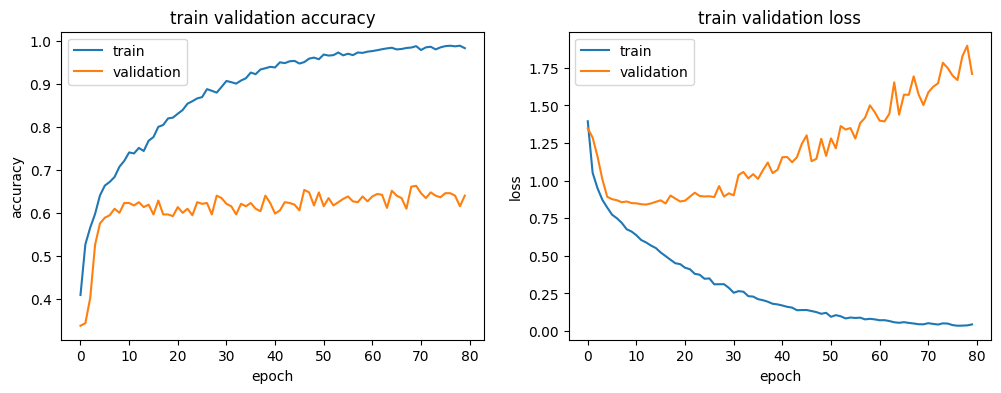

In [19]:
# Train and Validation accuracy and loss
f = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.title('train validation accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(1,2,2)
plt.title('train validation loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [20]:
y_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_prob, axis = -1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [21]:
# Accuracy
acc_1d = round(accuracy_score(y_pred,y_test),2)

In [25]:
acc_1d

0.73

In [23]:
# Confusion Matrix
cm_1d = confusion_matrix(y_test,y_pred)
cm_display_1d = ConfusionMatrixDisplay(confusion_matrix = cm_1d, display_labels = ['Happy', 'Relaxed', 'Sad'])

              precision    recall  f1-score   support

       Happy       0.77      0.79      0.78        97
     Relaxed       0.75      0.67      0.71        98
         Sad       0.66      0.71      0.69        97

    accuracy                           0.73       292
   macro avg       0.73      0.73      0.73       292
weighted avg       0.73      0.73      0.73       292



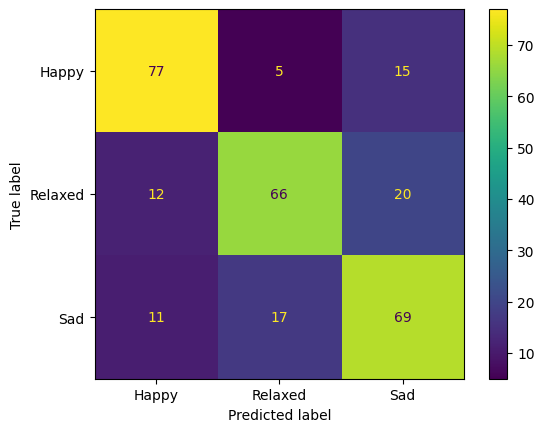

In [24]:
print(classification_report(y_test, y_pred, target_names = ['Happy', 'Relaxed', 'Sad']))
cm_display_1d.plot()
plt.show()